In [ ]:
# Code based on termpaper 2019 by Ashesh and Anders Høst

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# load data
df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n8.pkl")
df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n2.pkl")
df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")



In [8]:
sns.set(rc={"figure.figsize":(84/25.4,84/25.4)})
sns.set_style("whitegrid")

In [9]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
color = sns.color_palette("Set2", 6)

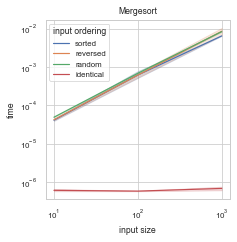

In [16]:
fig_merge = sns.lineplot(x="input size", y="time", data=df_merge, 
                         hue="input ordering")
plt.xscale("log")
plt.yscale("log")
plt.title('Mergesort')
fig_merge = fig_merge.get_figure()
#fig_merge.savefig("Mergesort.pdf")

In [17]:
# Concatenate

frames = [df_merge, df_combined, df_insertion]
df_all = pd.concat(frames, axis=0)

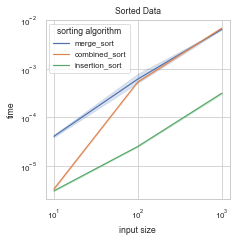

In [63]:
# Plot sorted

df_all_sorted = df_all[df_all["input ordering"] == "sorted"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_all_sorted)
plt.title("Sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()
fig_sorted.savefig("sorted_plot1000.pdf")

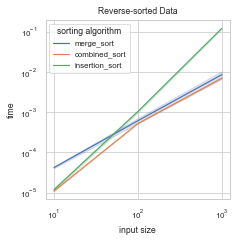

In [64]:
# Plot reversed

df_all_reversed = df_all[df_all["input ordering"] == "reversed"]
fig_reversed = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_reversed)
plt.title("Reverse-sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_reversed = fig_reversed.get_figure()
fig_reversed.savefig("reversed_plot1000.pdf")

PermissionError: [Errno 13] Permission denied: 'random_plot1000.pdf'

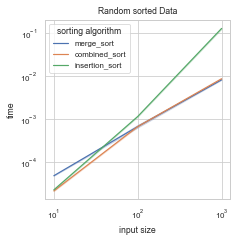

In [68]:
# Plot random

df_all_random = df_all[df_all["input ordering"] == "random"]
fig_random = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_random)
plt.title("Random sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_random = fig_random.get_figure()
fig_random.savefig("random_plot1000.pdf")

In [64]:
pd.options.display.max_columns = 55
pd.set_option('display.max_rows', 999)

In [100]:
import os
pkl = os.listdir('../data')

In [101]:
new_list=[]

for strg in pkl:
    if not strg.find('2048') == -1:
        new_list.append(strg)
new_list

['bubble_sort_n2048.pkl',
 'combined_sort_n2048.pkl',
 'insertion_sort_n2048.pkl',
 'merge_sort_n2048.pkl',
 'quick_sort_n2048.pkl',
 'sorted_n2048.pkl',
 'sort_n2048.pkl']

In [ ]:
# # load data
# df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
# df_bubble = pd.read_pickle(r"..\data\bubble_sort_n8.pkl")
# df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
# df_quick = pd.read_pickle(r"..\data\quick_sort_n2048.pkl")
# df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")

In [102]:
df_insertion = pd.read_pickle(r"..\data\insertion_sort_n2048.pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n2048.pkl")
df_merge = pd.read_pickle(r"..\data\merge_sort_n2048.pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n2048.pkl")
df_combined = pd.read_pickle(r"..\data\combined_sort_n2048.pkl")
df_python_sort = pd.read_pickle(r"..\data\sorted_n2048.pkl")
df_np_sort = pd.read_pickle(r"..\data\sort_n2048.pkl")


In [106]:
frames = [df_insertion, df_bubble, df_merge, df_quick, df_combined, df_python_sort, df_np_sort]

# # Replacing inconsistant column names in the saved data with same for all
# for frame in frames:
#     frame.columns = df_insertion.columns

# Concatonating all benchmarking dataframes into one
df_all_frames = pd.concat(frames, axis=0, ignore_index=True)

In [109]:
df_all_frames

,input order,input size,run number,sorting algorithm,time
0,sorted,1,1,insertion_sort,4.831036e-07
1,sorted,1,2,insertion_sort,6.827372e-07
2,sorted,1,3,insertion_sort,6.978830e-07
3,sorted,1,4,insertion_sort,5.753388e-07
4,sorted,1,5,insertion_sort,6.172138e-07
...,...,...,...,...,...
1255,random,2048,1,sort,1.004366e-04
1256,random,2048,2,sort,9.678782e-05
1257,random,2048,3,sort,1.185358e-04
1258,random,2048,4,sort,1.135230e-04


ValueError: Size is invalid. Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None

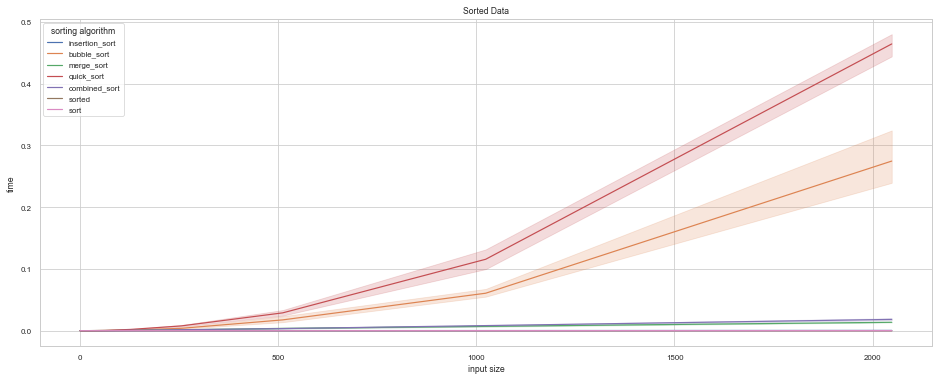

In [113]:
# Plot Categories
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random'
}
labels_size = 'x-large'
title_size = 'xxx-large'

for title, order in input_ordering.items():
    df_order_temp = df_all_frames[df_all_frames["input order"] == order]
    plt.figure(figsize=(16, 6))

    fig = sns.lineplot(x="input size",
                       y='time',
                       hue="sorting algorithm",
                       data=df_order_temp)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Input data size', fontsize=labels_size)
    plt.ylabel('Time', fontsize=labels_size)
    plt.xscale("log")
    plt.yscale("log")
    fig = fig.get_figure()
    #     fig_sorted.savefig("sorted_plot1000.pdf")
    plt.show()